# **Feature Selection**

# **Random Forest**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/preprocessed.csv')

In [3]:
X = df[['Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm','RainToday', 'Humidity3pm', 'Rainfall']]
y = df["RainTomorrow"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
rf = RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=128, oob_score=False)

In [7]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=128)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[31340  2718]
 [ 5551  4029]]


              precision    recall  f1-score   support

       False       0.85      0.92      0.88     34058
        True       0.60      0.42      0.49      9580

    accuracy                           0.81     43638
   macro avg       0.72      0.67      0.69     43638
weighted avg       0.79      0.81      0.80     43638



# **Logistic Regression**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log_model = LogisticRegression()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.fit_transform(X_test)

In [15]:
log_model.fit(scaler_X_train, y_train)

LogisticRegression()

In [16]:
y_pred = log_model.predict(scaler_X_test)

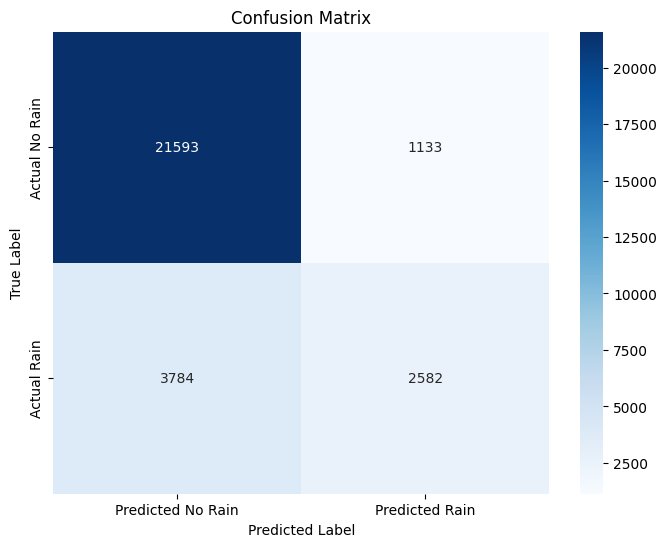

              precision    recall  f1-score   support

       False       0.85      0.95      0.90     22726
        True       0.70      0.41      0.51      6366

    accuracy                           0.83     29092
   macro avg       0.77      0.68      0.71     29092
weighted avg       0.82      0.83      0.81     29092



In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_test, y_pred))

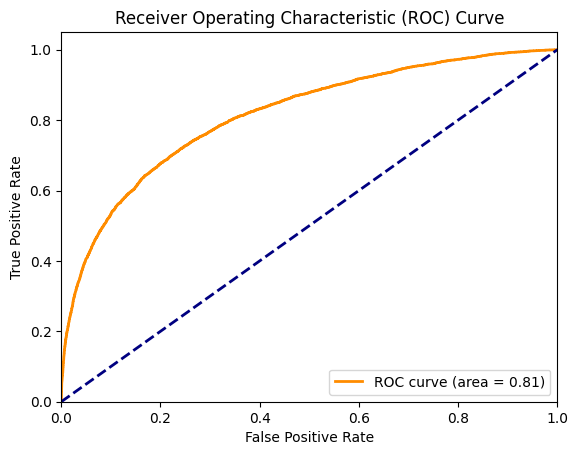

In [18]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = log_model.predict_proba(scaler_X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Decision Tree**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    importance = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
    print(importance)
    print('\n')
    sns.barplot(x = 'Feature Importance', y = importance.index, data=importance)

              precision    recall  f1-score   support

       False       0.84      0.83      0.84     34058
        True       0.43      0.46      0.44      9580

    accuracy                           0.75     43638
   macro avg       0.64      0.64      0.64     43638
weighted avg       0.75      0.75      0.75     43638



             Feature Importance
Humidity3pm            0.353063
Sunshine               0.228667
Humidity9am            0.194273
Cloud9am               0.090762
Cloud3pm               0.078248
Rainfall               0.053385
RainToday              0.001603




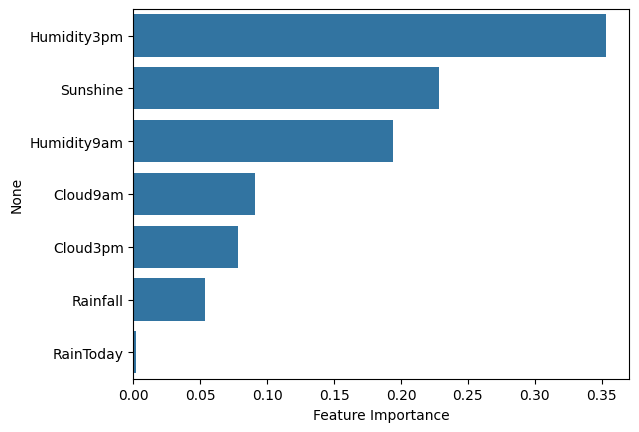

In [23]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
report_model(model)

# **Naive Bayes**

In [24]:
X = df[['Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm','RainToday', 'Humidity3pm', 'Rainfall']]
y = df["RainTomorrow"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

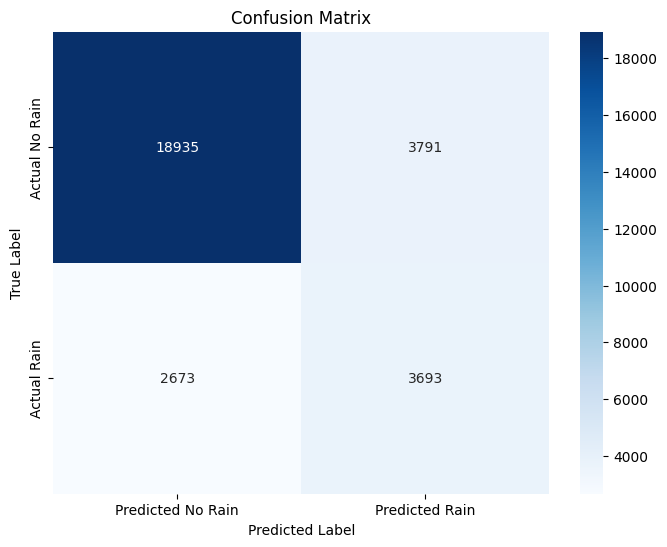

              precision    recall  f1-score   support

       False       0.88      0.83      0.85     22726
        True       0.49      0.58      0.53      6366

    accuracy                           0.78     29092
   macro avg       0.68      0.71      0.69     29092
weighted avg       0.79      0.78      0.78     29092



In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = gnb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_test, y_pred))

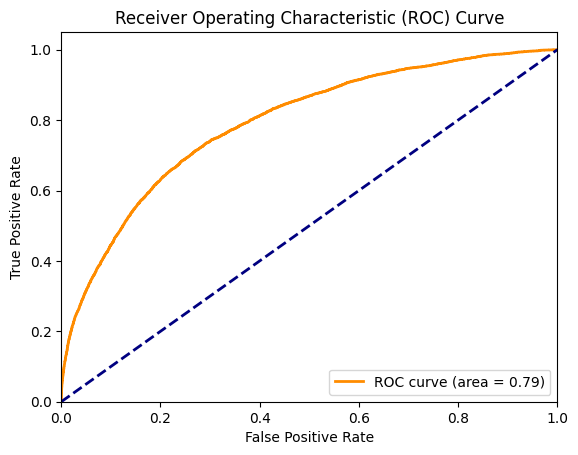

In [28]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = gnb.predict_proba(X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Artificial Neural Network**

In [29]:
X = df[['Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm','RainToday', 'Humidity3pm', 'Rainfall']]
y = df["RainTomorrow"]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(145460, 7)

In [31]:
from tensorflow.keras import layers, models, optimizers, callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)
model = models.Sequential()
model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=7))
model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
opt = optimizers.Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=[early_stopping], validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7795 - loss: 0.6069 - val_accuracy: 0.7823 - val_loss: 0.4489
Epoch 2/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7895 - loss: 0.4739 - val_accuracy: 0.8202 - val_loss: 0.4352
Epoch 3/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8056 - loss: 0.4596 - val_accuracy: 0.8216 - val_loss: 0.4280
Epoch 4/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8100 - loss: 0.4514 - val_accuracy: 0.8225 - val_loss: 0.4222
Epoch 5/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8112 - loss: 0.4448 - val_accuracy: 0.8221 - val_loss: 0.4195
Epoch 6/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8106 - loss: 0.4416 - val_accuracy: 0.8234 - val_loss: 0.4166
Epoch 7/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8109 - loss: 0.4385 - val_accuracy: 0.8248 - val_loss: 0.4138
Epoch 8/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8136 - lo

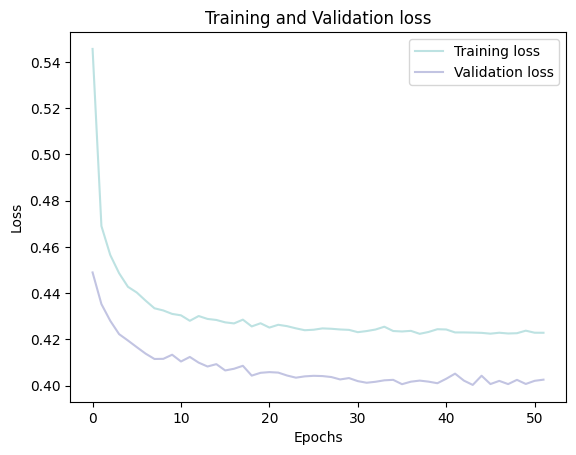

In [32]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

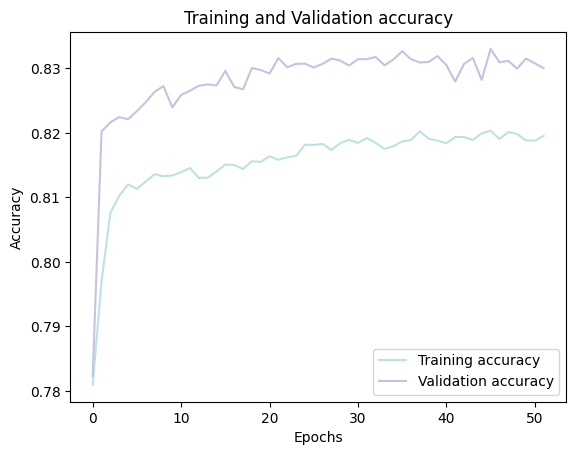

In [33]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

       False       0.84      0.96      0.90     22672
        True       0.73      0.36      0.49      6420

    accuracy                           0.83     29092
   macro avg       0.78      0.66      0.69     29092
weighted avg       0.82      0.83      0.81     29092



910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


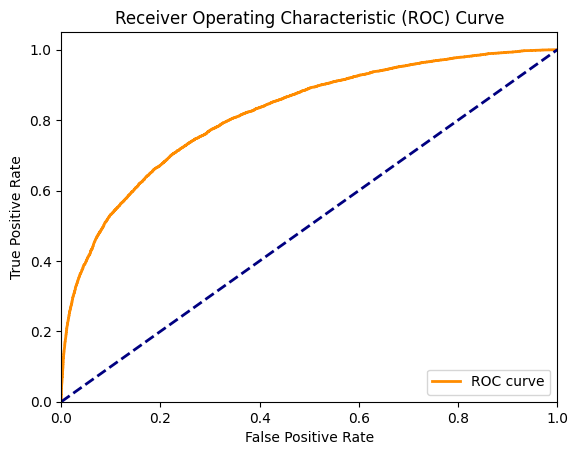

AUC: 0.8177964242058495


In [35]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

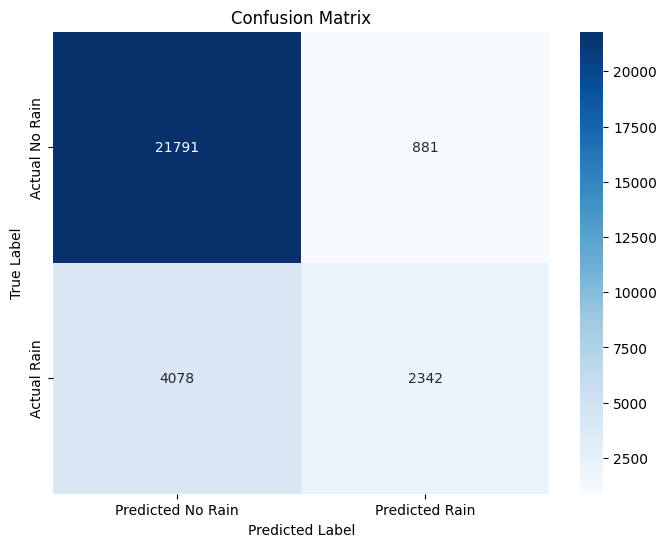

In [36]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()